# **ML Project: Exoplanet Hunting in Deep Space**
### Motivation:
Exoplanet hunting in deep space is done by tracking a star over several months or years, to observe if there is a regular 'dimming' of the flux (the light intensity). This is light dimming, is evidence that there may be an orbiting body around the star, such as a planet. This star could be considered to be a 'candidate' system for further depth observations, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'. Using a machine learning model is probably the only logical method of making this tedious task possible. 

### Dataset Description: 
[Kepler labelled time series data](https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data)

### Trainset:
* 5087 rows or observations.
* 3198 columns or features. // too many features. Try downsampling.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

### Testset:
* 570 rows or observations.
* 3198 columns or features.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

### References:
Let’s find planets beyond our solar system & milky way … . Available at: https://medium.datadriveninvestor.com/lets-find-planets-beyond-our-solar-system-milky-way-galaxy-with-the-help-of-905dcfc95d3d (Accessed: November 7, 2022). 



## **Importing the Data**

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [85]:
# read the train data
train_df = pd.read_csv('./exoTrain.csv')
train_df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


## **Data Analysis**

In [86]:
# extracting features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,5087.0,1.007273,0.084982,1.00,1.000,1.00,1.000,2.0
FLUX.1,5087.0,144.505445,21506.686590,-227856.26,-42.340,-0.71,48.255,1439240.5
FLUX.2,5087.0,128.577834,21797.167583,-315440.76,-39.520,-0.89,44.285,1453319.0
FLUX.3,5087.0,147.134789,21913.092010,-284001.76,-38.505,-0.74,42.325,1468429.0
FLUX.4,5087.0,156.151203,22233.659938,-234006.87,-35.050,-0.40,39.765,1495750.0
...,...,...,...,...,...,...,...,...
FLUX.3193,5087.0,655.303147,53399.785963,-502889.37,-24.405,3.50,30.855,3616292.0
FLUX.3194,5087.0,-494.784966,17844.469520,-775322.00,-26.760,-0.68,18.175,288607.5
FLUX.3195,5087.0,-544.594264,17722.339334,-732006.00,-24.065,0.36,18.770,215972.0
FLUX.3196,5087.0,-440.239100,16273.406292,-700992.00,-21.135,0.90,19.465,207590.0


In [87]:
# seperate the data in two lists, based on whether they have exoplanets or not
exoplanets = []
no_exoplanets = []
for i in range(len(train_df)):
    if train_df['LABEL'][i] == 2:
        exoplanets += [train_df.iloc[i,1:]]
    else:
        no_exoplanets += [train_df.iloc[i,1:]]

print('len(exoplanets)',len(exoplanets))
print('len(no_exoplanets)',len(no_exoplanets))

len(exoplanets) 37
len(no_exoplanets) 5050


In [88]:
# extract data about the means of each list
no_exo_stats = scipy.stats.describe(no_exoplanets)
print('avg mean_no_exoplanet:', int(np.average(no_exo_stats.mean)))
print('max mean_no_exoplanet:', int(np.max(no_exo_stats.mean)))
print('min mean_no_exoplanet:', int(np.min(no_exo_stats.mean)))

print()

exo_stats = scipy.stats.describe(exoplanets)
print('avg mean_exoplanet:',    int(np.average(exo_stats.mean)))
print('max mean_exoplanet:',    int(np.max(exo_stats.mean)))
print('min mean_exoplanet:',    int(np.min(exo_stats.mean)))

avg mean_no_exoplanet: 131
max mean_no_exoplanet: 1825
min mean_no_exoplanet: -699

avg mean_exoplanet: -47
max mean_exoplanet: 4096
min mean_exoplanet: -3149


## **Data Visualization**

Plotting the stars with exoplanets

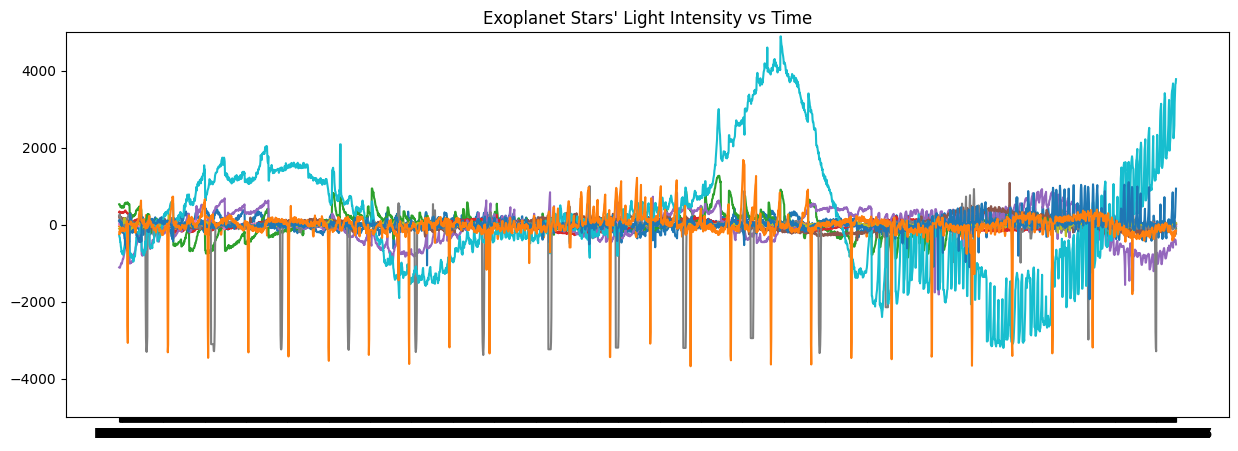

In [89]:
plt.figure(figsize=(15,5)) 
for i in range(12):
    plt.plot(exoplanets[i])
    plt.ylim([-5000,5000])
plt.title(label='Exoplanet Stars\' Light Intensity vs Time')
plt.show()

Plotting the stars without exoplanets

In [90]:
plt.figure(figsize=(15,5))  
for i in range(20):
    plt.subplot()
    plt.plot(no_exoplanets[i])
    plt.ylim([-5000,5000])
plt.title(label='No Exoplanet Stars\' Light Intensity vs Time')
plt.show()

Plotting the stars with exoplanets, but normalize them based on max intensity of each star

In [ ]:
normalized_exo = []

for exo in exoplanets:
    normalized_exo.append(exo/np.max(exo))

plt.figure(figsize=(15,5))  
for i in range(12):
    plt.plot(normalized_exo[i])
plt.title(label='Normalized Exoplanet Stars\' Light Intensity vs Time')
plt.show()

Plotting the stars without exoplanets, but normalized 

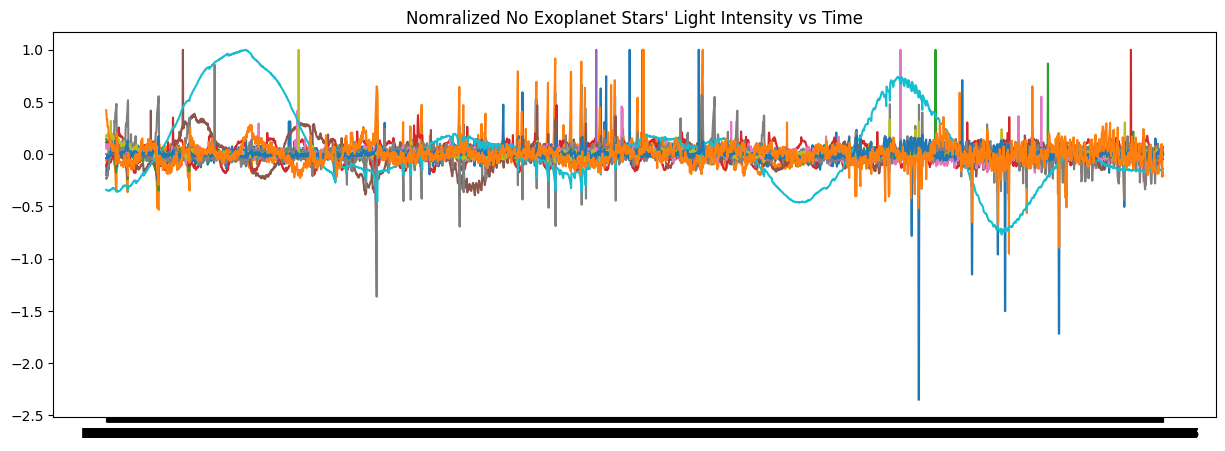

In [ ]:
normalized_no_exo = []

for no_exo in no_exoplanets:
    normalized_no_exo.append(no_exo/np.max(no_exo))

plt.figure(figsize=(15,5))   
for i in range(12):
    plt.plot(normalized_no_exo[i])
plt.title(label='Normalized No Exoplanet Stars\' Light Intensity vs Time')
plt.show()

## **Machine Learning Part**

This part still has to be finished.

We have used Logistic Regression to do a simple Classsification of the data. The preliminary results are not optimal with around 50% accuarcy.

The next step is to evaluate the possibility of using Neural Networks or Support Vector Machines, this is due to the low number of positives (37 out of 5087 total stars).

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
val_df = pd.read_csv('./exoTest.csv')

In [ ]:
train_X = train_df.drop('LABEL',axis = 1)
val_X = val_df.drop('LABEL',axis =1)
train_y = train_df['LABEL'].values
val_y = val_df['LABEL'].values


In [ ]:
lr = LogisticRegression()
lr.fit(train_X,train_y)

In [ ]:
y_pred_val_lr = lr.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print("\n")
print(classification_report(val_y, y_pred_val_lr))